<a href="https://colab.research.google.com/github/Afzalfaizi/AI_with_Irfan_Malik/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Seaborn colour palette**


Colour plays very important role in data visualization. Colour adds various dimensions to a plot when used effectively.
A palette means a flat surface on which a painter mixes paints.


Seaborn provides a function called **color_palette()**. It can be used to give colours to plots and adding aesthetic value to it. It return a list of colors defining a color palette.


There are several readily available Seaborn palettes. These are:-

•	Deep

•	Muted

•	Bright

•	Pastel

•	Dark

•	Colorblind

Besides these we can also create new palettes.

There is another function **seaborn.palplot()** which deals with color palettes. This function plots the color palette as a horizontal array.


**Categorical Color Palettes**

Qualitative or categorical palettes are best suitable to plot the categorical data as follows:-


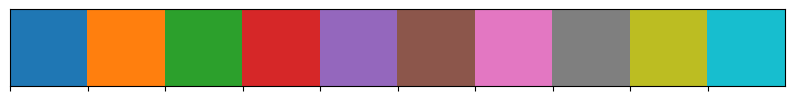

In [3]:
current_palette1 = sns.color_palette()

sns.palplot(current_palette1)

plt.show()


**Continous Color Palettes**

Sequential plots are suitable to express the distribution of data ranging from relative lower values to higher values within a range. Appending an additional character "s" to the color passed to the color parameter will plot the Sequential plot.

We need to append 's' to the parameter like 'Greens' as follows:-


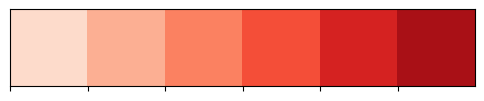

In [4]:
current_palette2 = sns.color_palette()

sns.palplot( sns.color_palette("Reds"))

plt.show()


**Diverging Color Palette**

Diverging palettes use two different colors. Each color represents variation in the value ranging from a common point in either direction.

We assume plotting the data ranging from -1 to 1. The values from -1 to 0 takes one color and 0 to +1 takes another color.

By default, the values are centered from zero. We can control it with parameter center by passing a value as follows:-


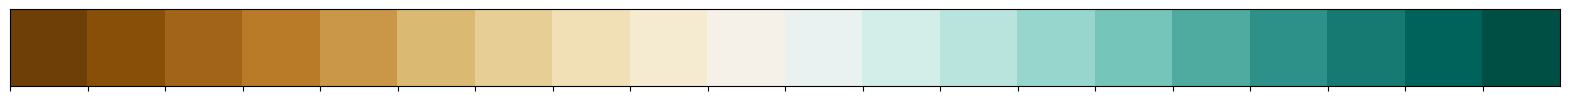

In [5]:
current_palette3 = sns.color_palette()

sns.palplot(sns.color_palette("BrBG", 20))

plt.show()

# **Seaborn on Titanic dataset**

In this tutorial, we will learn to use different Searbon plot functions to get insight from data. We will use Titanic dataset to experiment these searbon kind of plot.

### Prerequisites
You should have a basic understanding of ***computer programming terminologies***. A basic understanding of ***Python*** and any of the programming languages is a plus. Seaborn library is built on top of Matplotlib. Having basic idea of ***Matplotlib*** will help you understand this tutorial in a better way.


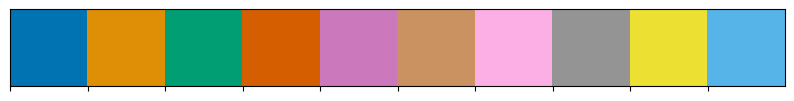

In [6]:
current_palette2 = sns.color_palette()

sns.palplot( sns.color_palette("colorblind"))

plt.show()

### Import the Data
Let's extract the our **Titanic data** from the .csv file, create a  pandas DataFrame and look at the available indicators:

- ***Survived***: Outcome of survival (0 = No; 1 = Yes)
- ***Pclass***: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- ***Name***: Name of passenger
- ***Sex***: Sex of the passenger
- ***Age***: Age of the passenger (Some entries contain NaN)
- ***SibSp***: Number of siblings and spouses of the passenger aboard
- ***Parch***: Number of parents and children of the passenger aboard
- ***Ticket***: Ticket number of the passenger
- ***Fare***: Fare paid by the passenger
- ***Cabin***: Cabin number of the passenger (Some entries contain NaN)
- ***Embarked***: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [7]:
full_data = pd.read_csv('/content/titanic_dataset.csv')

In [8]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
full_data.shape

(891, 12)

In [12]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


[Go back to the Table of Contents](#table_of_contents)
** **
<a id = "Distribution"></a>
## 2. Distribution plots
Distribution of data is the foremost thing that we need to understand while analysing the data. Here, we will see how seaborn helps us in understanding the distribution of our data.

<a id = "distplot"></a>
### 2.1. distplot
The `distplot()` function provides the most convenient way to take a quick look at univariate distribution. This function will plot a `histogram` that fits the **kernel density estimation(KDE)** of the data.

Now let's plot the histogram of **Number of parents and children of the passenger aboard(parch)**.


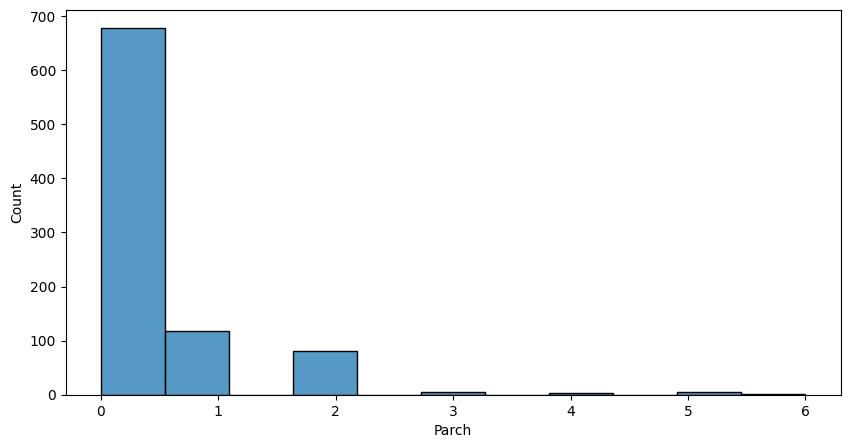

In [13]:
sns.histplot(full_data['Parch'],kde=False)
plt.show()

As we can see, most passengers don't have neither parents nor children aboard.
<a id = "kdeplot"></a>
### 2.2. kdeplot
***Kernel Density Estimation (KDE)*** is a way to estimate the probability density function of a continuous random variable. It is used for ***non-parametric*** analysis. Setting the `hist` flag to False in `distplot` will yield the KDE plot. For bivariate distribution, we can plot a kde by using `jointplot()`. Pass value `‘kde’` to the parameter `kind` to plot kernel plot.

**Note:** `distplot(data)` is used to visualize the ***parametric distribution*** of data. It plot both KDE and histogram on the same figure.

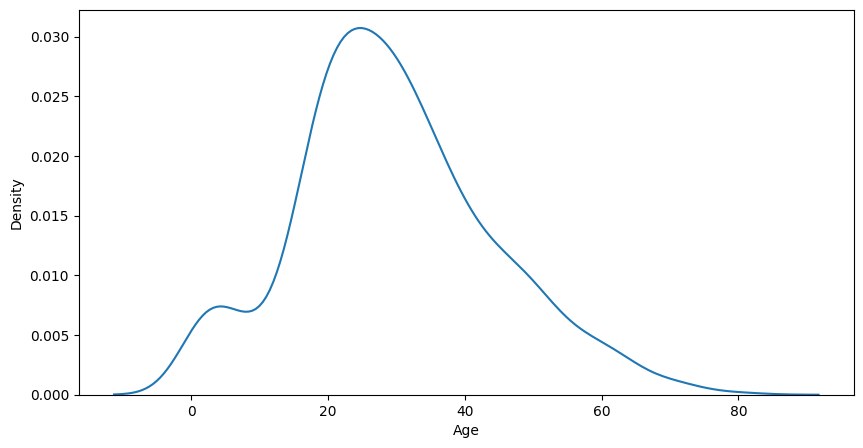

In [21]:
sns.distplot(full_data['Age'], hist=False)
plt.show()

As we can see that most of the passenger has the age between 20 to 40

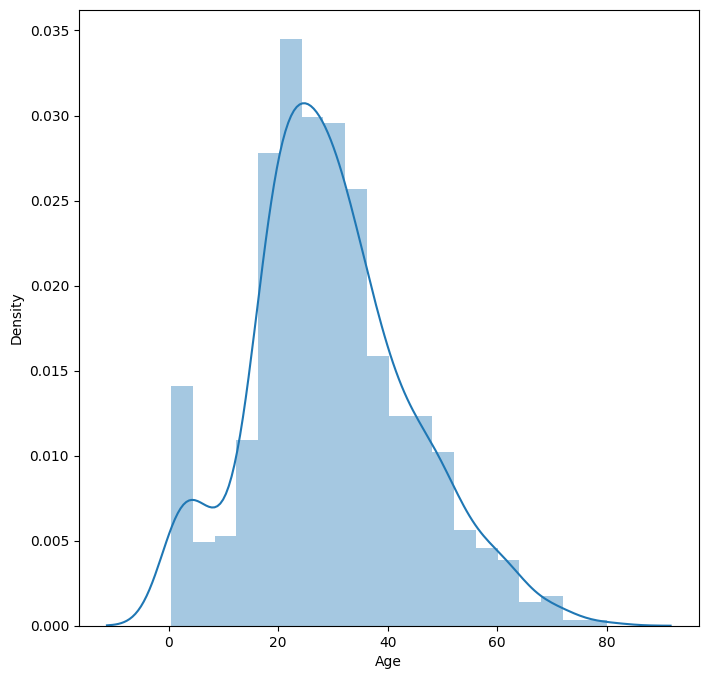

In [22]:
plt.figure(figsize=(8,8))
sns.distplot(full_data['Age'])
plt.show()

[Go back to the Table of Contents](#table_of_contents)
** **
<a id = "Relational"></a>
## 3. Relational plots

<a id = "relplot"></a>
### 3.1. relplot
Figure-level interface for drawing relational plots onto a FacetGrid.

The function `relplot()` is named that way because it is designed to visualize many different statistical relationships. While scatter plots are a highly effective way of doing this, relationships where one variable represents a measure of time are better represented by a line. The `relplot()` function has a convenient `kind` parameter to let you easily switch to this alternate representation.


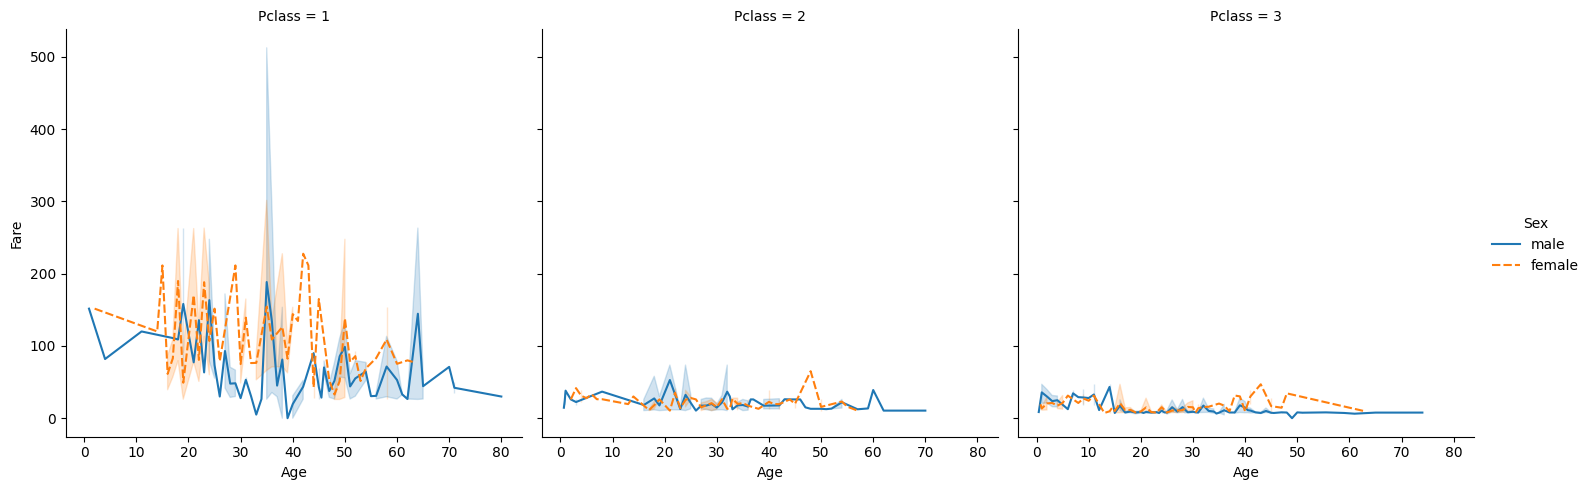

In [23]:
sns.relplot(x="Age", y="Fare", col="Pclass", hue="Sex", style="Sex",kind="line", data=full_data) # scatter can be used instead of "line" plot
plt.show()

<a id = "scatterplot"></a>
### 3.2. scatterplot
**Scatter plot** is the most convenient way to visualize the distribution where each observation is represented in two -dimensional plot via x and y axis.

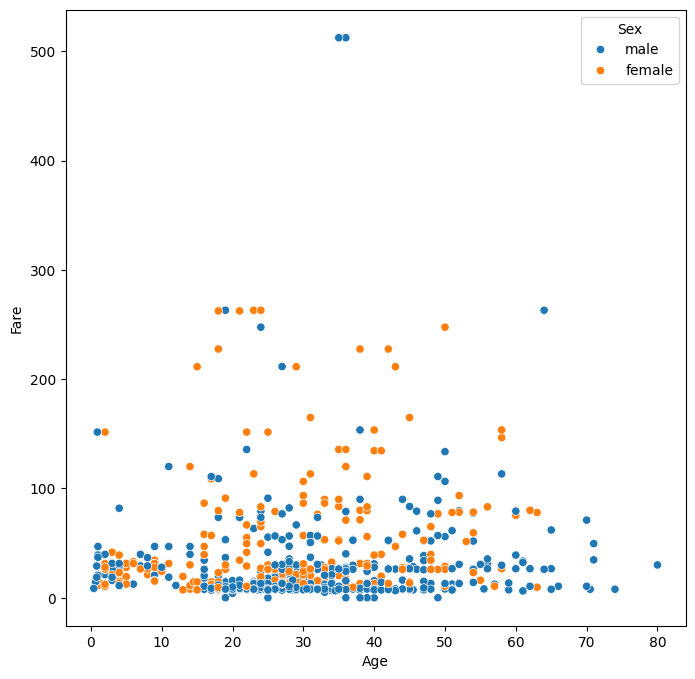

In [24]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=full_data)
plt.show()

<a id = "lineplot"></a>
### 3.3. lineplot
Draw a line plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets of the data using the `hue, size`, and `style` parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both **hue** and **style** for the same variable) can be helpful for making graphics more accessible.

The default treatment of the hue (and to a lesser extent, size) semantic, if present, depends on whether the variable is inferred to represent **“numeric” or “categorical”** data. In particular, numeric variables are represented with a sequential colormap by default, and the legend entries show regular **“ticks”** with values that may or may not exist in the data. This behavior can be controlled through various parameters.

By default, the plot aggregates over multiple `y` values at each value of `x` and shows an estimate of the central tendency and a confidence interval for that estimate.


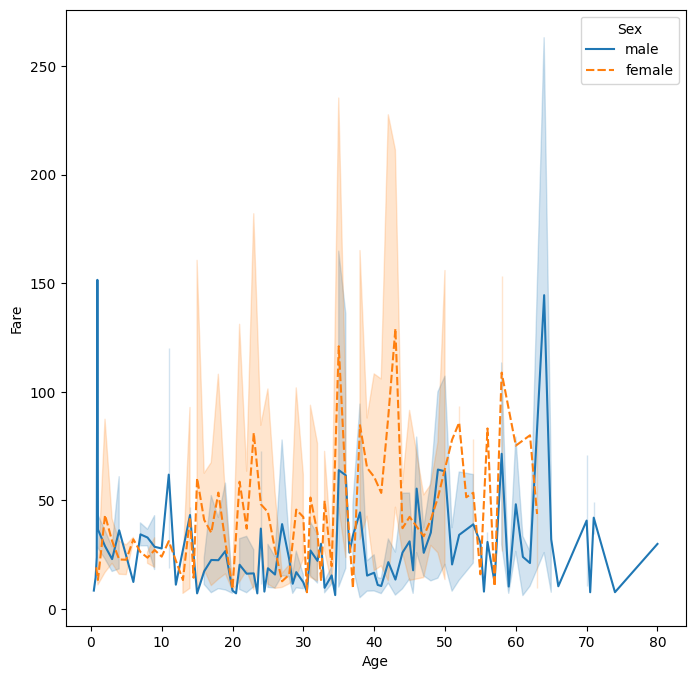

In [25]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age", y="Fare", hue="Sex", style="Sex", data=full_data)
plt.show()

[Go back to the Table of Contents](#table_of_contents)
** **
<a id = "features"></a>
## 4. Categorical Plot
When one or both the variables under study are categorical, we use plots like `striplot(), swarmplot(), etc,`. Seaborn provides interface to do so.
<a id = "barplot"></a>
### 4.1. barplot
***The `barplot()` shows the relation between a categorical variable and a continuous variable.*** The data is represented in rectangular bars where the length the bar represents the proportion of the data in that category.
**Bar plot** represents the estimate of ***central tendency.***

**Note:** don't confuse **Bar plot** and **Histogram**. Please back to `2.1. distplot` section to see the difference.


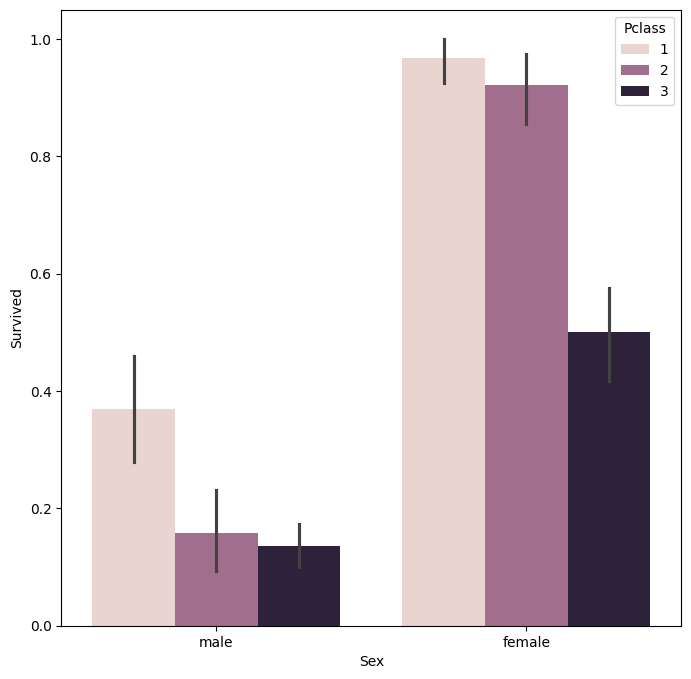

In [26]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=full_data)
plt.show()

**As we can see, More women survived than men.**
<a id = "stripplot"></a>
### 4.2. stripplot
`stripplot()` is used when one of the variable under study is categorical. It represents the data in sorted order along any one of the axis.

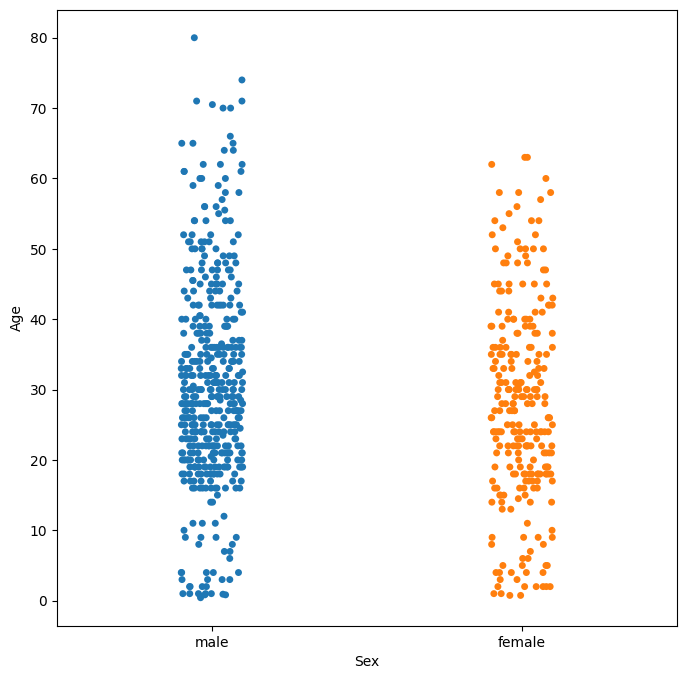

In [27]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Sex", y="Age",hue='Sex', data=full_data)
plt.show()

To avoid the overlapping of the points, we can use the `jitter` to add some random noise to the data. This parameter will adjust the positions along the categorical axis. But Another option which can be used as an alternate to `‘Jitter’` is function `swarmplot()`.

<a id = "swarmplot"></a>
### 4.3. swarmplot
This function positions each point of scatter plot on the categorical axis and thereby avoids overlapping points:

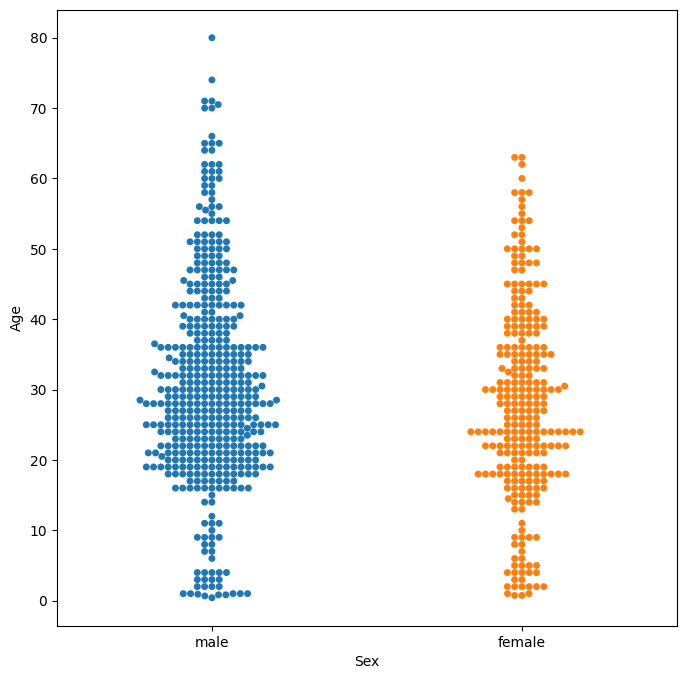

In [28]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex", y="Age",hue='Sex', data=full_data)
plt.show()

### **TRAINING DATA PRE-PROCESSING**
The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.   

As such, data pre-processing addresses:
- Assumptions about data shape
- Incorrect data types
- Outliers or errors
- Missing values
- Categorical variables

In [29]:
full_data = pd.read_csv('/content/titanic_dataset.csv')

**Data Shape**  
After loading the dataset, I examine its shape to get a better sense of the data and the information it contains.  

In [30]:
# Data shape
print('train data:',full_data.shape)

train data: (891, 12)


In [31]:
# View first few rows
full_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Missing Data**  
From the entry totals above, there appears to be missing data.  A heatmap will help better visualize what features as missing the most information.

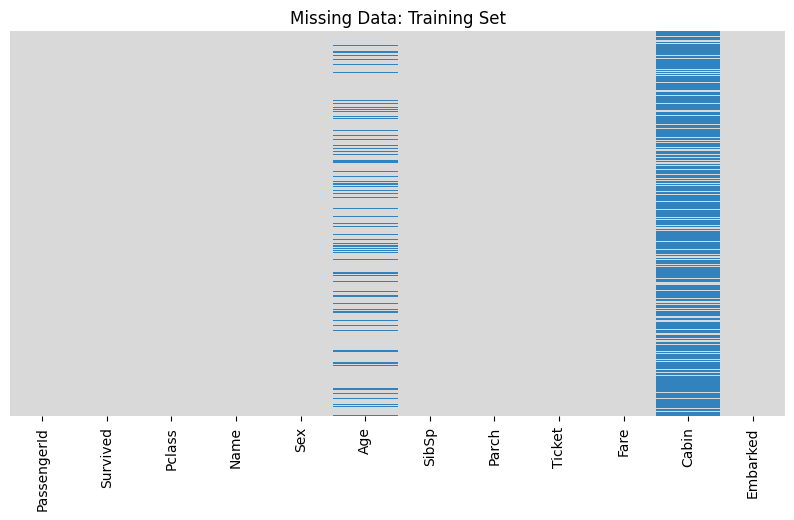

In [33]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

The 'Age' variable is missing roughly 20% of its data. This proportion is likely small enough for reasonable replacements using some form of imputation as well (using the knowledge of the other columns to fill in reasonable values).
However, too much data from the 'Cabin' column is missing to do anything useful with it at a basic level. This column may need to be dropped from the data set altogether or change to another feature such as 'Cabin Known: 1 or 0'.  

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However, we can be smarter about this and check the average age by passenger class.


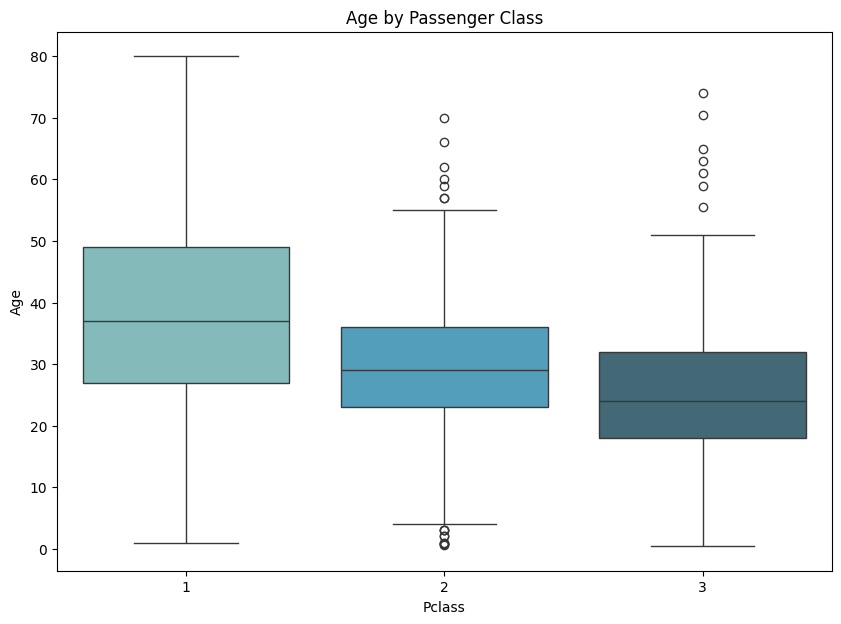

In [36]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = full_data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

Naturally, the wealthier passengers in the higher classes tend to be older . We'll use these average age values to impute based on Pclass for Age.


In [37]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:

            return 29

        else:
            return 24

    else:
        return Age

# Apply the function to the Age column
full_data['Age']=full_data[['Age','Pclass']].apply(impute_age, axis =1 )


The Cabin column has too many missing values to do anything useful with, so it would be best to remove it from the data frame altogether.

In [40]:
# Remove Cabin feature
full_data.drop('Cabin', axis = 1, inplace = True) # Iadded the comments after dropping the cabin feature because the column was dropped earlier, so don't worry if the error is getting due to run later.

KeyError: "['Cabin'] not found in axis"

Since there is only one missing value in Embarked, that observation can just be removed.

In [41]:
# Remove rows with missing data
full_data.dropna(inplace = True)

Name and Ticket can be removed from the dataset as these features do not provide additional information about a passenger's liklihood of survival.    

The remaining non-null objects, Sex and Embarked, will need to be specified as categories for better analysis results downstream.  

In [42]:
full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [43]:
# Remove unnecessary columns
full_data.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    full_data[colname] = full_data[colname].astype('category')

In [44]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [46]:
# Checking the info after changing of type of Sex and Embarked feature
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Sex          889 non-null    category
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    int64   
 6   Parch        889 non-null    int64   
 7   Fare         889 non-null    float64 
 8   Embarked     889 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 57.5 KB


In [47]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [48]:
# Numeric summary
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId can be removed from the dataset because it does not add any useful information in predicting a passenger's survival.  The remaining variables are the correct data type.

In [49]:
# Remove PasangerId
full_data.drop('PassengerId', inplace=True, axis=1)

In [50]:
full_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### **GETTING MODEL READY**

Now that we've explored the data, it is time to get these features 'model ready'. Categorial features will need to be converted into 'dummy variables', otherwise a machine learning algorithm will not be able to take in those features as inputs.

In [51]:
# Shape of train data
full_data.shape

(889, 8)

In [52]:
# Identify categorical features
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [53]:
# Convert categorical variables into 'dummy' or indicator variables
sex = pd.get_dummies(full_data['Sex'], drop_first = True) # drop_first prevents multi-collinearity
embarked = pd.get_dummies(full_data['Embarked'], drop_first = True)

In [54]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [55]:
# Add new dummy columns to data frame
full_data = pd.concat([full_data, sex, embarked], axis = 1)
full_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [56]:
# Drop unecessary columns
full_data.drop(['Sex', 'Embarked'], axis = 1, inplace = True)

# Shape of train data
print('train_data shape',full_data.shape)

# Confirm changes
full_data.head()

train_data shape (889, 9)


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True



>Now the train data is perfect for a machine learning algorithm:  
- all the data is numeric
- everything is concatenated together

## **OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [58]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = full_data['Survived'] # y is the column we're trying to predict


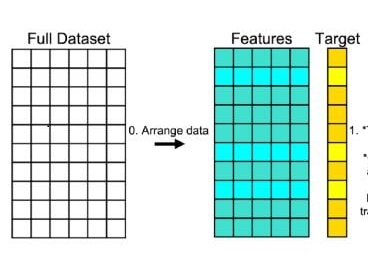

In [59]:
x # x Represents the Features
x.shape

(889, 8)

In [60]:
y # y represents the Target
y.shape

(889,)

In [61]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

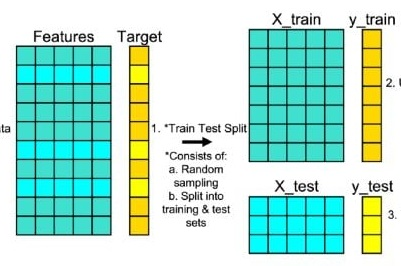

In [63]:
x_train.shape
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
307,1,17.0,1,0,108.9000,False,False,False
229,3,24.0,3,1,25.4667,False,False,True
82,3,24.0,0,0,7.7875,False,True,False
353,3,25.0,1,0,17.8000,True,False,True
707,1,42.0,0,0,26.2875,True,False,True
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,False,False,True
840,3,20.0,0,0,7.9250,True,False,True
338,3,45.0,0,0,8.0500,True,False,True
524,3,24.0,0,0,7.2292,True,False,False


In [64]:
# y_train.shape
y_train

,Survived
307,1
229,0
82,1
353,0
707,1
...,...
576,1
840,0
338,1
524,0


In [65]:
x_test.shape
x_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,24.0,0,0,8.0500,True,False,True
613,3,24.0,0,0,7.7500,True,True,False
615,2,24.0,1,2,65.0000,False,False,True
337,1,41.0,0,0,134.5000,False,False,False
718,3,24.0,0,0,15.5000,True,True,False
...,...,...,...,...,...,...,...,...
155,1,51.0,0,1,61.3792,True,False,False
450,2,36.0,1,2,27.7500,True,False,True
756,3,28.0,0,0,7.7958,True,False,True
187,1,45.0,0,0,26.5500,True,False,True


### **LOGISTIC REGRESSION**

## **Model Training**

In [66]:
# Fit
# Import model
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()

# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

## **Model Testing**

## **Class prediction**

In [67]:
# Predict
y_pred_lreg = lreg.predict(x_test)
print(y_pred_lreg)
print(y_pred_lreg.shape)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
(178,)


## **Probabilities of each class**

The predict_proba method returns an array where each row sums to 1, as it contains the probabilities of the sample belonging to each class. For a binary classification problem, the first column corresponds to the probability of the sample being in class 0, and the second column corresponds to the probability of the sample being in class 1.

In [68]:
probabilities = lreg.predict_proba(x_test)[:, 1]
print(probabilities.shape)
print(probabilities)

(178,)
[0.10924935 0.17772458 0.74825877 0.92025138 0.17922649 0.04189854
 0.1156383  0.23012532 0.07881496 0.67516507 0.78826138 0.94478826
 0.10922951 0.5776417  0.10943599 0.12263233 0.91633726 0.84250606
 0.54118518 0.10003356 0.10932815 0.08694465 0.42380989 0.34708057
 0.04222221 0.43917484 0.60040509 0.58879965 0.09294294 0.2992689
 0.09263931 0.25346267 0.01225676 0.10605379 0.10917808 0.11038923
 0.75617649 0.06366979 0.12244952 0.13442602 0.53043764 0.1374201
 0.11914215 0.92766948 0.61211771 0.12698803 0.61567226 0.86570816
 0.10290515 0.26675072 0.48912705 0.79796934 0.16935295 0.12291584
 0.10912079 0.07195908 0.42747867 0.08624726 0.0742984  0.91082638
 0.67516507 0.93430039 0.8890562  0.08653978 0.13953247 0.04975356
 0.11567792 0.43216659 0.0580107  0.14301869 0.33800773 0.13594226
 0.6196515  0.88739773 0.11184524 0.72910388 0.08107175 0.13594226
 0.10373776 0.29707829 0.29919581 0.3763369  0.45071201 0.12263233
 0.28122988 0.6584507  0.07120203 0.87046732 0.09897599 0

## **Probabilities along with the class**

In [69]:
for i in range(len(y_test)):
  print(round(probabilities[i], 3)," --> ", y_pred_lreg[i])

0.109  -->  0
0.178  -->  0
0.748  -->  1
0.92  -->  1
0.179  -->  0
0.042  -->  0
0.116  -->  0
0.23  -->  0
0.079  -->  0
0.675  -->  1
0.788  -->  1
0.945  -->  1
0.109  -->  0
0.578  -->  1
0.109  -->  0
0.123  -->  0
0.916  -->  1
0.843  -->  1
0.541  -->  1
0.1  -->  0
0.109  -->  0
0.087  -->  0
0.424  -->  0
0.347  -->  0
0.042  -->  0
0.439  -->  0
0.6  -->  1
0.589  -->  1
0.093  -->  0
0.299  -->  0
0.093  -->  0
0.253  -->  0
0.012  -->  0
0.106  -->  0
0.109  -->  0
0.11  -->  0
0.756  -->  1
0.064  -->  0
0.122  -->  0
0.134  -->  0
0.53  -->  1
0.137  -->  0
0.119  -->  0
0.928  -->  1
0.612  -->  1
0.127  -->  0
0.616  -->  1
0.866  -->  1
0.103  -->  0
0.267  -->  0
0.489  -->  0
0.798  -->  1
0.169  -->  0
0.123  -->  0
0.109  -->  0
0.072  -->  0
0.427  -->  0
0.086  -->  0
0.074  -->  0
0.911  -->  1
0.675  -->  1
0.934  -->  1
0.889  -->  1
0.087  -->  0
0.14  -->  0
0.05  -->  0
0.116  -->  0
0.432  -->  0
0.058  -->  0
0.143  -->  0
0.338  -->  0
0.136  -->  0
0.

## **Model Evaluation**

In [70]:
# Score It
from sklearn.metrics import classification_report, accuracy_score

print('Classification Model')
# Accuracy
print('--'*30)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Classification Model
------------------------------------------------------------
Accuracy 82.02 %


### **Interpretation**  
**Accuracy**  
82% of the model's predictions are correct.